## 📚 Download content from Wikipedia 🌐
---

First, you need to install the `wikipedia` library 📦

In [35]:
!pip install wikipedia
from sklearn.feature_extraction.text import TfidfVectorizer
import nltk
from nltk.stem import PorterStemmer, WordNetLemmatizer
import pandas as pd
import wikipedia
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from wordcloud import WordCloud

## 🌐 Downloading Wikipedia Content 📚
---

Let's fetch articles from Wikipedia for these topics:

* 📊 **Data Science**
* 🤖 **Artificial Intelligence**
* 🏦 **European Central Bank**
* 🏛️ **Bank**
* 📱 **Financial Technology**
* 🌍 **International Monetary Fund**
* 🏀 **Basketball**
* 🏊 **Swimming**

In [36]:
# Defines a list of Wikipedia article titles that we want to download
articles=['Data Science','Artificial intelligence',
          'European Central Bank','Bank','Financial technology','International Monetary Fund',
          'Basketball','Swimming']

wiki_lst=[]
title=[]

for article in articles:

    print("loading content: ",article)

    wiki_lst.append(wikipedia.page(article).content)


    title.append(article)

print("examine content")
wiki_lst

loading content:  Data Science
loading content:  Artificial intelligence
loading content:  European Central Bank
loading content:  Bank
loading content:  Financial technology
loading content:  International Monetary Fund
loading content:  Basketball
loading content:  Swimming
examine content


['Data science is an interdisciplinary academic field that uses statistics, scientific computing, scientific methods, processing, scientific visualization, algorithms and systems to extract or extrapolate knowledge from potentially noisy, structured, or unstructured data. \nData science also integrates domain knowledge from the underlying application domain (e.g., natural sciences, information technology, and medicine). Data science is multifaceted and can be described as a science, a research paradigm, a research method, a discipline, a workflow, and a profession.\nData science is "a concept to unify statistics, data analysis, informatics, and their related methods" to "understand and analyze actual phenomena" with data. It uses techniques and theories drawn from many fields within the context of mathematics, statistics, computer science, information science, and domain knowledge. However, data science is different from computer science and information science. Turing Award winner Jim

##TF-IDF example

In [37]:
# --- Download nltk resources (run this once) ---
nltk.download('wordnet')
nltk.download('stopwords')

# --- Preprocessing Functions ---
stemmer = PorterStemmer()
lemmatizer = WordNetLemmatizer()

def stemmed_words(doc):
    """
    This function performs stemming on the words in a document, while also removing English stop words
    using TfidfVectorizer's built-in stop word list.

    Args:
        doc (str): The input document (text) to be processed.

    Returns:
        list: A list of stemmed words from the document (excluding stop words).
    """
    analyzer = TfidfVectorizer(stop_words='english').build_analyzer()
    return [stemmer.stem(w) for w in analyzer(doc)]

def lemmatized_words(doc):
    """
    This function performs lemmatization on the words in a document, while also removing English stop words
    using TfidfVectorizer's built-in stop word list.

    Args:
        doc (str): The input document (text) to be processed.

    Returns:
        list: A list of lemmatized words from the document (excluding stop words).
    """
    analyzer = TfidfVectorizer(stop_words='english').build_analyzer()
    return [lemmatizer.lemmatize(w) for w in analyzer(doc)]

# --- Vectorizers with Stemming and Lemmatization ---
vectorizer_stem = TfidfVectorizer(stop_words='english', analyzer=stemmed_words)

vectorizer_lemma = TfidfVectorizer(stop_words='english', analyzer=lemmatized_words)


# --- Apply Vectorizers ---

X_stem = vectorizer_stem.fit_transform(wiki_lst)

X_lemma = vectorizer_lemma.fit_transform(wiki_lst)

print("\n--- Example of Stemming vs Lemmatization ---")
example_words = ["running", "runs", "ran", "better", "good", "goods", "university", "universe"]
stemmed_examples = [stemmer.stem(word) for word in example_words]
lemmatized_examples = [lemmatizer.lemmatize(word) for word in example_words] #

print("\nOriginal words:", example_words)
print("Stemmed words:", stemmed_examples)
print("Lemmatized words:", lemmatized_examples)

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
/usr/local/lib/python3.11/dist-packages/sklearn/feature_extraction/text.py:539: UserWarning: The parameter 'stop_words' will not be used since 'analyzer' != 'word'
  warnings.warn(



--- Example of Stemming vs Lemmatization ---

Original words: ['running', 'runs', 'ran', 'better', 'good', 'goods', 'university', 'universe']
Stemmed words: ['run', 'run', 'ran', 'better', 'good', 'good', 'univers', 'univers']
Lemmatized words: ['running', 'run', 'ran', 'better', 'good', 'good', 'university', 'universe']


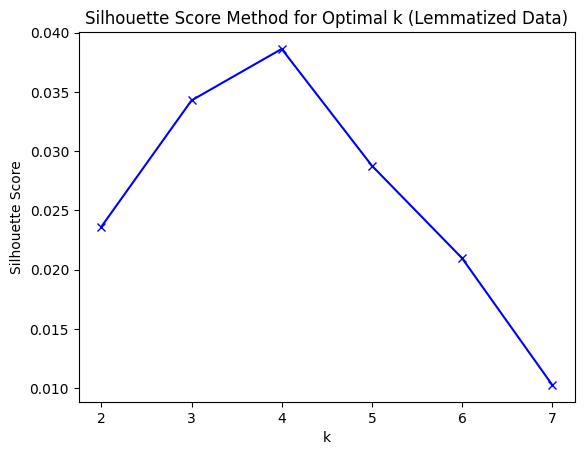

Optimal k found by Silhouette Score (Lemmatized Data): 4


In [38]:
silhouette_scores = []
K = range(2, 8) # Test range starting from 2 clusters

for k in K:
    kmeans_model = KMeans(n_clusters=k, init='k-means++', max_iter=300, n_init=10, random_state=0)
    cluster_labels = kmeans_model.fit_predict(X_lemma) # Use X_lemma here
    silhouette_avg = silhouette_score(X_lemma, cluster_labels) # Use X_lemma here
    silhouette_scores.append(silhouette_avg)

plt.plot(K, silhouette_scores, 'bx-')
plt.xlabel('k')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score Method for Optimal k (Lemmatized Data)') # Updated title
plt.show()

# Find k with the highest silhouette score
optimal_k_silhouette = K[silhouette_scores.index(max(silhouette_scores))]
print(f"Optimal k found by Silhouette Score (Lemmatized Data): {optimal_k_silhouette}") # Updated output message

In [41]:
true_k = 4 # You can adjust this based on the elbow plot or Silhouette score

model = KMeans(n_clusters=true_k, init='k-means++', max_iter=200, n_init=10, random_state=0)
model.fit(X_lemma)
labels=model.labels_
wiki_cl=pd.DataFrame(list(zip(title,labels)),columns=['title','cluster'])

print(wiki_cl.sort_values(by=['cluster']))

                         title  cluster
6                   Basketball        0
3                         Bank        1
7                     Swimming        1
0                 Data Science        2
1      Artificial intelligence        2
2        European Central Bank        3
4         Financial technology        3
5  International Monetary Fund        3
